In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
df2020=pd.read_csv("C:/Users/shirl/OneDrive/Desktop/python/python projects/Lily/Order form for the first half of 2020.csv")
df2019=pd.read_csv("C:/Users/shirl/OneDrive/Desktop/python/python projects/Lily/Order form for the second half of 2019.csv")

In [5]:
dfYear=pd.concat([df2019,df2020])

In [6]:
dfYear.head()

,Order Number,Product ID,Product Name,Sale_price,Amount,Total_price,Order_date
0,700010201907010015,700010,kid's mask,20,22,440,2019-07-01 08:00:15
1,700011201907010015,700011,socks,5,19,95,2019-07-01 08:00:15
2,700010201907014510,700010,kid's mask,20,20,400,2019-07-01 08:45:10
3,700011201907014510,700011,socks,5,17,85,2019-07-01 08:45:10
4,700010201907010338,700010,kid's mask,20,24,480,2019-07-01 10:03:38


In [7]:
dfYear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29734 entries, 0 to 20603
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order Number  29734 non-null  int64 
 1   Product ID    29734 non-null  int64 
 2   Product Name  29734 non-null  object
 3   Sale_price    29734 non-null  int64 
 4   Amount        29734 non-null  int64 
 5   Total_price   29734 non-null  int64 
 6   Order_date    29734 non-null  object
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [8]:
dfYear["Order_date"]=pd.to_datetime(dfYear["Order_date"])
dfnewYear=dfYear.set_index("Order_date")

In [9]:
dfSales=dfnewYear["Amount"].groupby(dfnewYear["Product ID"]).resample("M").sum()
dfnewSales=dfSales.reset_index()
dfnewSales["Order_date"]=dfnewSales["Order_date"].dt.strftime("%Y-%m")

In [10]:
dfEV=pd.read_csv("C:/Users/shirl/OneDrive/Desktop/python/python projects/Lily/Exposure.csv")

In [11]:
dfEV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     72 non-null     object
 1   ID        72 non-null     int64 
 2   Exposure  72 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.8+ KB


In [12]:
dfEV.head()

,Month,ID,Exposure
0,2019-07,700010,130013
1,2019-07,700011,26001
2,2019-07,700012,30990
3,2019-07,700013,30010
4,2019-07,700014,30381


In [13]:
dfTotal = pd.merge(dfEV,dfnewSales,left_on=["ID","Month"],right_on=["Product ID","Order_date"])

In [14]:
df=dfTotal[["Month","ID","Exposure","Amount"]]

In [15]:
df["Purchase_conv_rt"]=df["Amount"]/df["Exposure"]

<ipython-input-15-ac13d72e33cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Purchase_conv_rt"]=df["Amount"]/df["Exposure"]


In [16]:
df = df.set_index(df["ID"])
df1 = df.groupby(df["ID"]).count()
index=df1.index

In [17]:
plt.rcParams["font.sans-serif"]="Times New Roman"

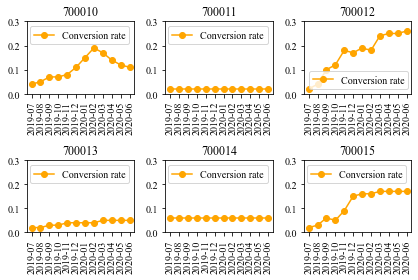

In [18]:
for i in range(len(index)):
    plt.subplot(2,3,i+1)
    df2 = df[df["ID"]== index[i]]
    plt.plot(df2["Month"],df2["Purchase_conv_rt"].round(2),color="orange",marker="o",label="Conversion rate")
    plt.xticks(rotation=90)
    plt.ylim(0,0.3)
    plt.legend()
    plt.title(index[i])
plt.tight_layout()
plt.show()